In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

In [2]:
# read the dataset
df = pd.read_csv('D:/CapStone Project/Dumb/Models/Diabetic Dataset/diabetes.csv')

In [3]:
# show the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# get the random 10 records
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
238,9,164,84,21,0,30.8,0.831,32,1
402,5,136,84,41,88,35.0,0.286,35,1
301,2,144,58,33,135,31.6,0.422,25,1
153,1,153,82,42,485,40.6,0.687,23,0
405,2,123,48,32,165,42.1,0.520,26,0
63,2,141,58,34,128,25.4,0.699,24,0
171,6,134,70,23,130,35.4,0.542,29,1
659,3,80,82,31,70,34.2,1.292,27,1
169,3,111,90,12,78,28.4,0.495,29,0
38,2,90,68,42,0,38.2,0.503,27,1


In [6]:
# get the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# see the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# see the shape 
df.shape

(768, 9)

In [9]:
df.size

6912

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observations**
1. The dataset contains more younger people.
2. The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity.
3. Majority of People having insuling less than 200
4. Majority of people having Skinthickness  between 20-40
5. Majority of People having BP  between 60-80


Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


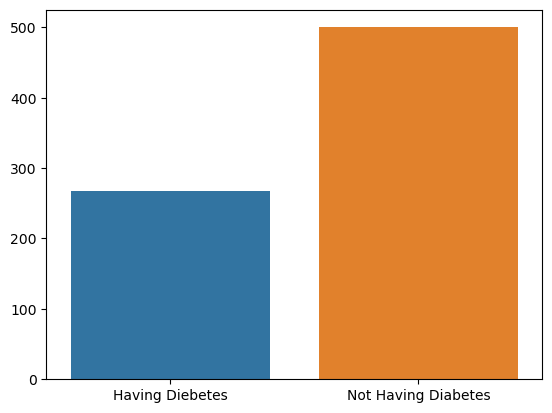

In [11]:
having_diabetes = df[df["Outcome"]==1]
not_having = df[~(df["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],
       
           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(df),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(df),2)) + " %")


In [12]:
# Independant and Dependant features
X = df.drop('Outcome',axis=1)
y = df['Outcome']


# **Modelling**

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=44)

# ***Logistic Regression***

In [14]:
model = LogisticRegression(max_iter=200,fit_intercept=True)

In [15]:
 model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [16]:
model.classes_

array([0, 1], dtype=int64)

In [17]:
model.intercept_

array([-7.68060524])

In [18]:
model.coef_

array([[ 0.09188888,  0.0346821 , -0.01523879,  0.00516105, -0.00101416,
         0.07238457,  0.6788583 ,  0.01723018]])

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [21]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

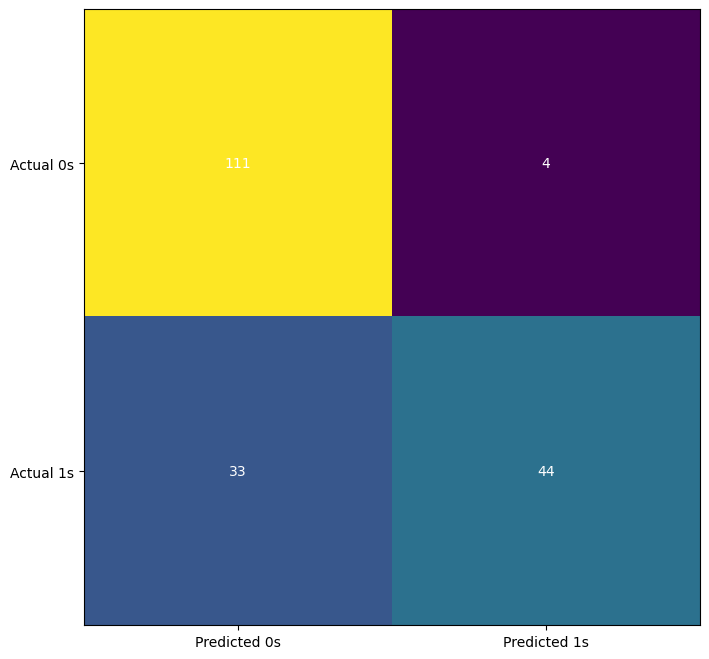

In [22]:
conf_mat = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')
plt.show()


In [23]:
conf_mat

array([[111,   4],
       [ 33,  44]], dtype=int64)

In [24]:
correct_predictions = (conf_mat[0][0] + conf_mat[1][1])
incorrect_predictions = (conf_mat[0][1] + conf_mat[1][0])
print("Correctly Predicted:\t" + str(correct_predictions))
print("Incorrectly Predicted:\t" + str(incorrect_predictions))
print("Correctness Score Percentage:\t" + str(round(correct_predictions/np.sum(conf_mat),2)*100) + " %")

Correctly Predicted:	155
Incorrectly Predicted:	37
Correctness Score Percentage:	81.0 %


In [25]:
round(accuracy_score(y_test,y_pred),2)

0.81

# **Model Evaluation**

In [26]:
def calculate_precision(tp,fp):
    return tp/(tp+fp)

In [27]:
def calculate_recall(tp,fn):
    return tp/(tp+fn)

In [28]:
def calculte_harmonic_mean(precision,recall):
    return 2 * precision * recall/(precision + recall)

In [29]:
def calculate_specificity(tn,fp):
    return tn/tn+fp

In [30]:
precision = calculate_precision(conf_mat[0][0],conf_mat[1][0])
recall = calculate_recall(conf_mat[0][0],conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(conf_mat[1][1],conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7708333333333334
Recall:	0.9652173913043478
F1 Score:	0.8571428571428572
Specificity Score:	34.0


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       115
           1       0.92      0.57      0.70        77

    accuracy                           0.81       192
   macro avg       0.84      0.77      0.78       192
weighted avg       0.83      0.81      0.80       192



# **K Nearest Neighbours**

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_pred = knn_classifier.predict(X_test)

c:\Users\sridh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
knn_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [35]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

# KNN Evaluation

In [36]:
accuracy_score(y_test,knn_pred)
knn_conf_mat = confusion_matrix(y_test,knn_pred)
knn_conf_mat

array([[96, 19],
       [38, 39]], dtype=int64)

In [37]:
precision = calculate_precision(knn_conf_mat[0][0],knn_conf_mat[1][0])
recall = calculate_recall(knn_conf_mat[0][0],knn_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(knn_conf_mat[1][1],knn_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7164179104477612
Recall:	0.8347826086956521
F1 Score:	0.7710843373493976
Specificity Score:	39.0


In [38]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       115
           1       0.67      0.51      0.58        77

    accuracy                           0.70       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.70      0.70      0.69       192



# Decision Trees

In [39]:
tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5)

In [40]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [41]:
tree_pred = tree_classifier.predict(X_test)

In [42]:
tree_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [43]:
y_test

452    0
370    1
746    1
122    0
614    1
      ..
458    1
524    0
43     1
66     1
76     0
Name: Outcome, Length: 192, dtype: int64

In [44]:
accuracy_score(y_test,tree_pred)

0.78125

In [45]:
tree_conf_mat = confusion_matrix(y_test,tree_pred)
tree_conf_mat

array([[102,  13],
       [ 29,  48]], dtype=int64)

# Decision Tree Evaluation

In [46]:
precision = calculate_precision(tree_conf_mat[0][0],tree_conf_mat[1][0])
recall = calculate_recall(tree_conf_mat[0][0],tree_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(tree_conf_mat[1][1],tree_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7786259541984732
Recall:	0.8869565217391304
F1 Score:	0.8292682926829268
Specificity Score:	30.0


In [47]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       115
           1       0.79      0.62      0.70        77

    accuracy                           0.78       192
   macro avg       0.78      0.76      0.76       192
weighted avg       0.78      0.78      0.78       192



***Visualizing the Decision Tree***

# RandomForest

In [48]:
forest_classifier = RandomForestClassifier(n_estimators=100)

In [49]:
forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
forest_pred = forest_classifier.predict(X_test)

In [51]:
forest_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [52]:
y_test.values

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

# RandomForest Evaluation

In [53]:
forest_conf_mat = confusion_matrix(y_test,forest_pred)
forest_conf_mat

array([[104,  11],
       [ 33,  44]], dtype=int64)

In [54]:
accuracy_score(y_test,forest_pred)

0.7708333333333334

In [55]:
precision = calculate_precision(forest_conf_mat[0][0],forest_conf_mat[1][0])
recall = calculate_recall(forest_conf_mat[0][0],forest_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(forest_conf_mat[1][1],forest_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7591240875912408
Recall:	0.9043478260869565
F1 Score:	0.8253968253968254
Specificity Score:	34.0


In [56]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       115
           1       0.80      0.57      0.67        77

    accuracy                           0.77       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.78      0.77      0.76       192



***Visualization of Tree in RandomForest***

In [57]:
svm_classifier = SVC()

In [58]:
svm_classifier.fit(X_train,y_train)

SVC()

In [59]:
svm_pred = svm_classifier.predict(X_test)

# SVM Evaluation

In [60]:
accuracy_score(y_test,svm_pred)

0.7552083333333334

In [61]:
svm_conf_mat = confusion_matrix(y_test,svm_pred)
svm_conf_mat

array([[111,   4],
       [ 43,  34]], dtype=int64)

In [62]:
precision = calculate_precision(svm_conf_mat[0][0],svm_conf_mat[1][0])
recall = calculate_recall(svm_conf_mat[0][0],svm_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(svm_conf_mat[1][1],svm_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7207792207792207
Recall:	0.9652173913043478
F1 Score:	0.8252788104089218
Specificity Score:	44.0


In [63]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       115
           1       0.89      0.44      0.59        77

    accuracy                           0.76       192
   macro avg       0.81      0.70      0.71       192
weighted avg       0.79      0.76      0.73       192



# Gradient Boosting Classifier

In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
gbc_pred = GBC.predict(X_test)
gbc_conf_mat = confusion_matrix(y_test, gbc_pred)
gbc_conf_mat

array([[103,  12],
       [ 33,  44]], dtype=int64)

In [66]:
accuracy_score(y_test,gbc_pred)

0.765625

In [67]:
precision = calculate_precision(gbc_conf_mat[0][0],gbc_conf_mat[1][0])
recall = calculate_recall(gbc_conf_mat[0][0],gbc_conf_mat[0][1])
harmonic_mean = calculte_harmonic_mean(precision,recall)
specificity = calculate_specificity(gbc_conf_mat[1][1],gbc_conf_mat[1][0])
print("Precision:\t" +str(precision))
print("Recall:\t" +str(recall))
print("F1 Score:\t" +str(harmonic_mean))
print("Specificity Score:\t" + str(specificity))

Precision:	0.7573529411764706
Recall:	0.8956521739130435
F1 Score:	0.8207171314741035
Specificity Score:	34.0


In [68]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       115
           1       0.79      0.57      0.66        77

    accuracy                           0.77       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



# Visualization of Performance of All Models

In [69]:
score_df = pd.DataFrame()
score_df['Model'] = pd.Series(['Logistic Regression','KNN','DecisionTrees','RandomForest','SVM','GradientBoostingClassifier'])
score_df['Recall'] = pd.Series([calculate_recall(conf_mat[0][0],conf_mat[0][1]),
                               calculate_recall(knn_conf_mat[0][0],knn_conf_mat[0][1]),
                               calculate_recall(tree_conf_mat[0][0],tree_conf_mat[0][1]),
                                calculate_recall(forest_conf_mat[0][0],forest_conf_mat[0][1]),
                                calculate_recall(svm_conf_mat[0][0],svm_conf_mat[0][1]),
                                calculate_recall(gbc_conf_mat[0][0],gbc_conf_mat[0][1]),
                               ])
score_df["Precision"] = pd.Series([
                           calculate_precision(conf_mat[0][0],conf_mat[1][0]), 
                            calculate_precision(knn_conf_mat[0][0],knn_conf_mat[1][0]), 
                            calculate_precision(tree_conf_mat[0][0],tree_conf_mat[1][0]), 
                            calculate_precision(forest_conf_mat[0][0],forest_conf_mat[1][0]), 
                            calculate_precision(svm_conf_mat[0][0],svm_conf_mat[1][0]), 
                            calculate_precision(gbc_conf_mat[0][0],gbc_conf_mat[1][0]), 
])


#score_df['F1 Score'] = calculte_harmonic_mean(score_df['Precision'],score_df['Recall'])
#score_df['Specificity Score'] = pd.Series([
#                       calculate_specificity(conf_mat[1][1],conf_mat[1][0]),
#                       calculate_specificity(knn_conf_mat[1][1],knn_conf_mat[1][0]),
#                        calculate_specificity(tree_conf_mat[1][1],tree_conf_mat[1][0]),
#                        calculate_specificity(forest_conf_mat[1][1],forest_conf_mat[1][0]),
#                        calculate_specificity(svm_conf_mat[1][1],svm_conf_mat[1][0]),
#                        calculate_specificity(gbc_conf_mat[1][1],gbc_conf_mat[1][0])
#])

score_df['Accuracy'] = pd.Series([
    accuracy_score(y_test,y_pred),
    accuracy_score(y_test,knn_pred),
    accuracy_score(y_test,tree_pred),
    accuracy_score(y_test,forest_pred),
    accuracy_score(y_test,svm_pred),
    accuracy_score(y_test,gbc_pred)
    
])


In [70]:
score_df.style.background_gradient(cmap='bwr_r')

,Model,Recall,Precision,Accuracy
0,Logistic Regression,0.965217,0.770833,0.807292
1,KNN,0.834783,0.716418,0.703125
2,DecisionTrees,0.886957,0.778626,0.781250
3,RandomForest,0.904348,0.759124,0.770833
4,SVM,0.965217,0.720779,0.755208
5,GradientBoostingClassifier,0.895652,0.757353,0.765625


In [71]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','KNN','DecisionTrees','RandomForest','SVM','GradientBoostingClassifier'], 'Accuracy': [accuracy_score(y_test,y_pred)*100,
                                    accuracy_score(y_test,knn_pred)*100,accuracy_score(y_test,tree_pred)*100,accuracy_score(y_test,forest_pred)*100,
                                    accuracy_score(y_test,svm_pred)*100,accuracy_score(y_test,gbc_pred)*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,80.729167
1,KNN,70.312500
2,DecisionTrees,78.125000
3,RandomForest,77.083333
4,SVM,75.520833
5,GradientBoostingClassifier,76.562500


In [72]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ENSEMBLE


In [73]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[tree_classifier,knn_classifier,model],meta_classifier= forest_classifier,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

import pickle
pickle.dump(scv, open('diabetes.pkl', 'wb'))

confussion matrix
[[106   9]
 [ 27  50]]


Accuracy of StackingCVClassifier: 81.25 

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       115
           1       0.85      0.65      0.74        77

    accuracy                           0.81       192
   macro avg       0.82      0.79      0.80       192
weighted avg       0.82      0.81      0.81       192

